<a href="https://colab.research.google.com/github/mg1502/CodeClauseInternshipChatApplicationWebsockets/blob/main/Asthma_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

# Patient Dataset Features

1. **Patient ID**: A unique identifier assigned to each patient, ranging from 5034 to 7425.

### Demographic Details

1. **Age**: The age of the patients, ranging from 5 to 80 years.

2. **Gender**: Gender of the patients, coded as follows:
   * 0: Male
   * 1: Female

3. **Ethnicity**: Ethnicity of the patients, coded as follows:
   * 0: Caucasian
   * 1: African American
   * 2: Asian
   * 3: Other

4. **Education Level**: Education level of the patients, coded as follows:
   * 0: None
   * 1: High School
   * 2: Bachelor's
   * 3: Higher

### Lifestyle Factors

1. **BMI**: Body Mass Index of the patients, ranging from 15 to 40.

2. **Smoking**: Smoking status, coded as follows:
   * 0: No
   * 1: Yes

3. **Physical Activity**: Weekly physical activity in hours, ranging from 0 to 10 hours.

4. **Diet Quality**: Diet quality score, ranging from 0 to 10.

5. **Sleep Quality**: Sleep quality score, ranging from 4 to 10.

### Environmental and Allergy Factors

1. **Pollution Exposure**: Exposure to pollution, scored from 0 to 10.

2. **Pollen Exposure**: Exposure to pollen, scored from 0 to 10.

3. **Dust Exposure**: Exposure to dust, scored from 0 to 10.

4. **Pet Allergy**: Pet allergy status, coded as follows:
   * 0: No
   * 1: Yes

### Medical History

1. **Family History of Asthma**: Family history of asthma, coded as follows:
   * 0: No
   * 1: Yes

2. **History of Allergies**: History of allergies, coded as follows:
   * 0: No
   * 1: Yes

3. **Eczema**: Presence of eczema, coded as follows:
   * 0: No
   * 1: Yes

4. **Hay Fever**: Presence of hay fever, coded as follows:
   * 0: No
   * 1: Yes

5. **Gastroesophageal Reflux**: Presence of gastroesophageal reflux, coded as follows:
   * 0: No
   * 1: Yes

### Clinical Measurements

1. **Lung Function (FEV1)**: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.

2. **Lung Function (FVC)**: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.

### Symptoms

1. **Wheezing**: Presence of wheezing, coded as follows:
   * 0: No
   * 1: Yes

2. **Shortness of Breath**: Presence of shortness of breath, coded as follows:
   * 0: No
   * 1: Yes

3. **Chest Tightness**: Presence of chest tightness, coded as follows:
   * 0: No
   * 1: Yes

4. **Coughing**: Presence of coughing, coded as follows:
   * 0: No
   * 1: Yes

5. **Nighttime Symptoms**: Presence of nighttime symptoms, coded as follows:
   * 0: No
   * 1: Yes

6. **Exercise-Induced**: Presence of symptoms induced by exercise, coded as follows:
   * 0: No
   * 1: Yes

### Diagnosis Information

1. **Diagnosis**: Diagnosis status for Asthma, coded as follows:
   * 0: No
   * 1: Yes

### Confidential Information

1. **Doctor In Charge**: Confidential information about the doctor in charge, with "Dr_Confid" as the value for all patients.


In [ ]:
!pip install -q gdown
import gdown

file_id = '1XNIXqWdRhxgKA1K4mH70DnSnzZCkU3eM'
destination = '/content/asthama_disease_data.csv'

gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1XNIXqWdRhxgKA1K4mH70DnSnzZCkU3eM
To: /content/asthama_disease_data.csv
100%|██████████| 519k/519k [00:00<00:00, 22.5MB/s]


'/content/asthama_disease_data.csv'

In [ ]:
data= pd.read_csv('/content/asthama_disease_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [ ]:
data.shape

(2392, 29)

In [ ]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


## Data Cleaning and Data Manipulation

In [ ]:
data.drop(columns = ['PatientID', 'DoctorInCharge'], inplace = True)

In [ ]:
data['Gender'] = data['Gender'].map({0: 'Male', 1: 'Female'})
data['Ethnicity'] = data['Ethnicity'].map({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
data['EducationLevel'] = data['EducationLevel'].map({0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'})
data['Smoking'] = data['Smoking'].map({0: 'No', 1: 'Yes'})
data['PetAllergy'] = data['PetAllergy'].map({0: 'No', 1: 'Yes'})
data['FamilyHistoryAsthma'] = data['FamilyHistoryAsthma'].map({0: 'No', 1: 'Yes'})
data['HistoryOfAllergies'] = data['HistoryOfAllergies'].map({0: 'No', 1: 'Yes'})
data['Eczema'] = data['Eczema'].map({0: 'No', 1: 'Yes'})
data['HayFever'] = data['HayFever'].map({0: 'No', 1: 'Yes'})
data['GastroesophagealReflux'] = data['GastroesophagealReflux'].map({0: 'No', 1: 'Yes'})
data['Wheezing'] = data['Wheezing'].map({0: 'No', 1: 'Yes'})
data['ShortnessOfBreath'] = data['ShortnessOfBreath'].map({0: 'No', 1: 'Yes'})
data['ChestTightness'] = data['ChestTightness'].map({0: 'No', 1: 'Yes'})
data['Coughing'] = data['Coughing'].map({0: 'No', 1: 'Yes'})
data['NighttimeSymptoms'] = data['NighttimeSymptoms'].map({0: 'No', 1: 'Yes'})
data['ExerciseInduced'] = data['ExerciseInduced'].map({0: 'No', 1: 'Yes'})
data['Diagnosis'] = data['Diagnosis'].map({0: 'No', 1: 'Yes'})

In [ ]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,Male,African American,None,15.848744,No,0.894448,5.488696,8.701003,7.388481,...,No,1.369051,4.941206,No,No,Yes,No,No,Yes,No
1,26,Female,Asian,Bachelor,22.757042,No,5.897329,6.341014,5.153966,1.969838,...,No,2.197767,1.702393,Yes,No,No,Yes,Yes,Yes,No
2,57,Male,Asian,High School,18.395396,No,6.739367,9.196237,6.840647,1.460593,...,No,1.698011,5.022553,Yes,Yes,Yes,No,Yes,Yes,No
3,40,Female,Asian,High School,38.515278,No,1.404503,5.826532,4.253036,0.581905,...,No,3.032037,2.300159,Yes,No,Yes,Yes,Yes,No,No
4,61,Male,Caucasian,Higher,19.283802,No,4.604493,3.127048,9.625799,0.980875,...,No,3.470589,3.067944,Yes,Yes,Yes,No,No,Yes,No


In [ ]:
data.dtypes

,0
Age,int64
Gender,object
Ethnicity,object
EducationLevel,object
BMI,float64
Smoking,object
PhysicalActivity,float64
DietQuality,float64
SleepQuality,float64
PollutionExposure,float64


In [ ]:
for i in data.select_dtypes('float'):
    data[i] = data[i].round(2)

In [ ]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,Male,African American,None,15.85,No,0.89,5.49,8.70,7.39,...,No,1.37,4.94,No,No,Yes,No,No,Yes,No
1,26,Female,Asian,Bachelor,22.76,No,5.90,6.34,5.15,1.97,...,No,2.20,1.70,Yes,No,No,Yes,Yes,Yes,No
2,57,Male,Asian,High School,18.40,No,6.74,9.20,6.84,1.46,...,No,1.70,5.02,Yes,Yes,Yes,No,Yes,Yes,No
3,40,Female,Asian,High School,38.52,No,1.40,5.83,4.25,0.58,...,No,3.03,2.30,Yes,No,Yes,Yes,Yes,No,No
4,61,Male,Caucasian,Higher,19.28,No,4.60,3.13,9.63,0.98,...,No,3.47,3.07,Yes,Yes,Yes,No,No,Yes,No


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.select_dtypes(include = 'number').columns

Index(['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure',
       'LungFunctionFEV1', 'LungFunctionFVC'],
      dtype='object')

In [ ]:
data.select_dtypes(include = 'object').columns

Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [ ]:
data_numeric = data[['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                     'PollutionExposure', 'PollenExposure', 'DustExposure', 'LungFunctionFEV1', 'LungFunctionFVC']]

data_categorical = data[['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy',
                        'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
                        'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath',
                        'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced']]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.00,23.0000,42.000,61.0000,79.00
BMI,2392.0,27.244979,7.201582,15.03,20.9675,27.055,33.5550,39.99
PhysicalActivity,2392.0,5.051768,2.903490,0.00,2.5800,5.020,7.5425,10.00
DietQuality,2392.0,5.022768,2.910050,0.00,2.4300,5.115,7.5425,10.00
SleepQuality,2392.0,7.018980,1.732531,4.00,5.5000,6.975,8.5300,10.00
PollutionExposure,2392.0,5.013039,2.935536,0.00,2.4300,5.035,7.6300,10.00
PollenExposure,2392.0,5.114281,2.893069,0.00,2.6000,5.100,7.7100,10.00
DustExposure,2392.0,4.981923,2.859184,0.00,2.4675,4.900,7.4325,10.00
LungFunctionFEV1,2392.0,2.548658,0.861788,1.00,1.8200,2.550,3.2900,4.00
LungFunctionFVC,2392.0,3.741334,1.303761,1.50,2.6100,3.735,4.8600,6.00


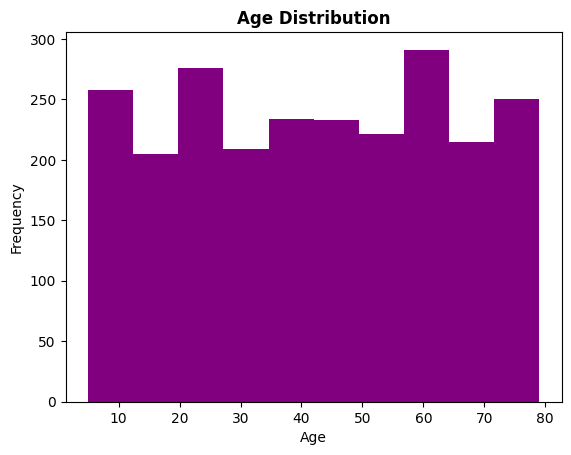

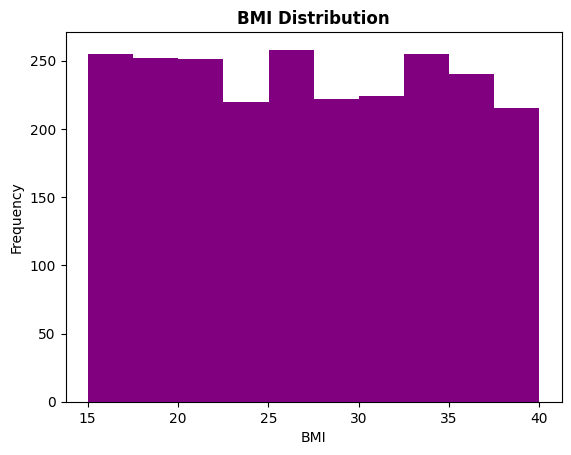

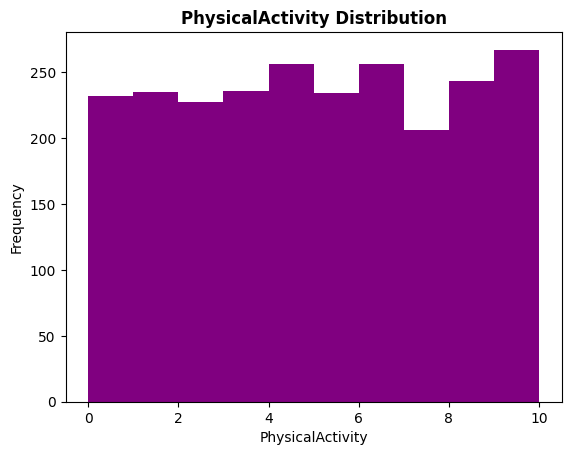

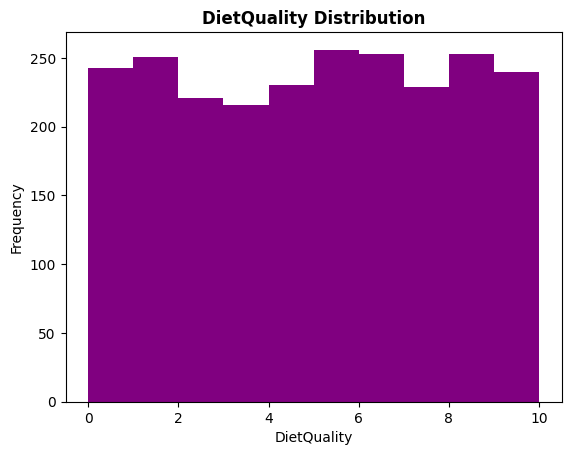

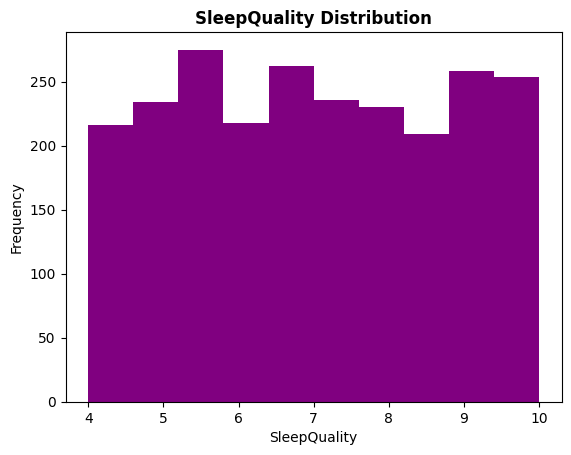

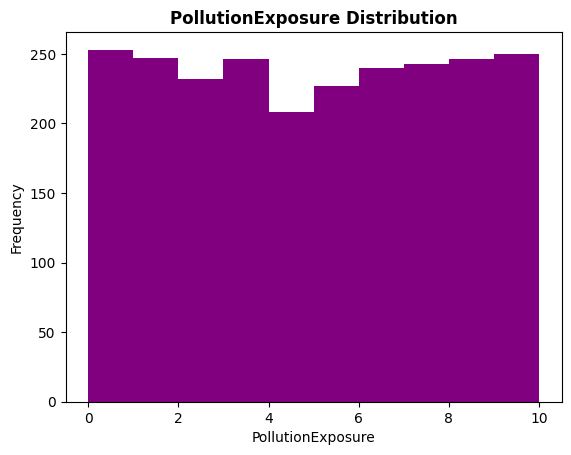

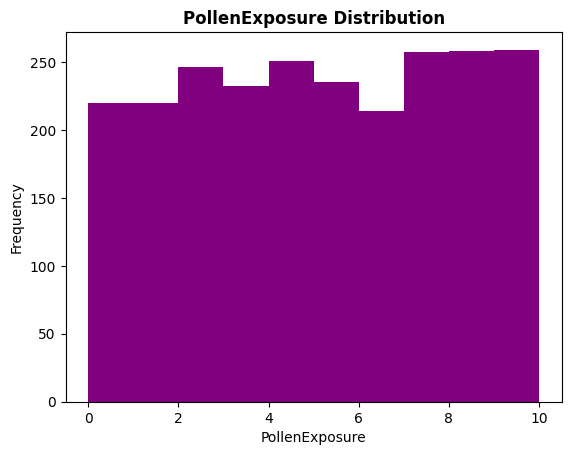

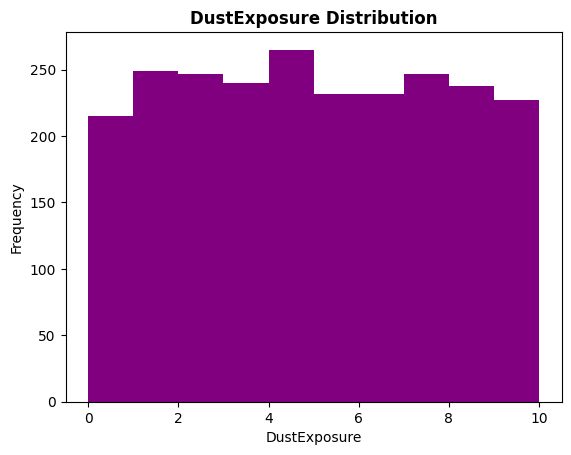

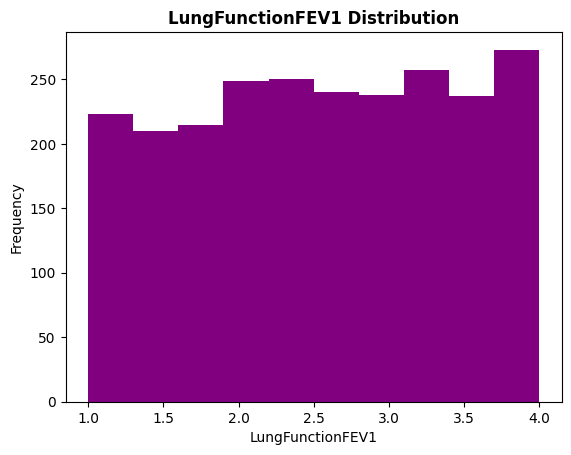

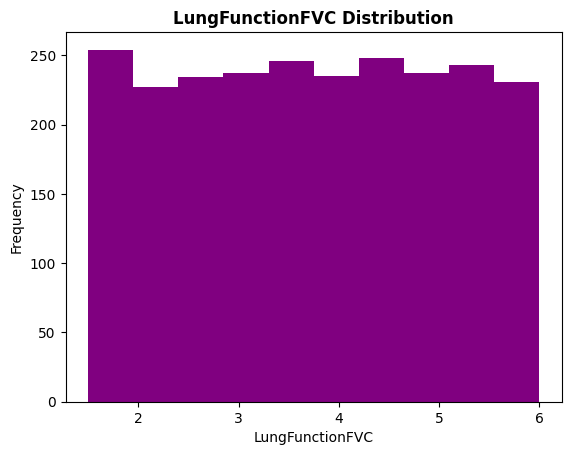

In [ ]:
for i in data_numeric.columns:
    plt.hist(x = data_numeric[i], color = 'purple')
    plt.title(i + ' Distribution', weight = 'bold')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()
    print()


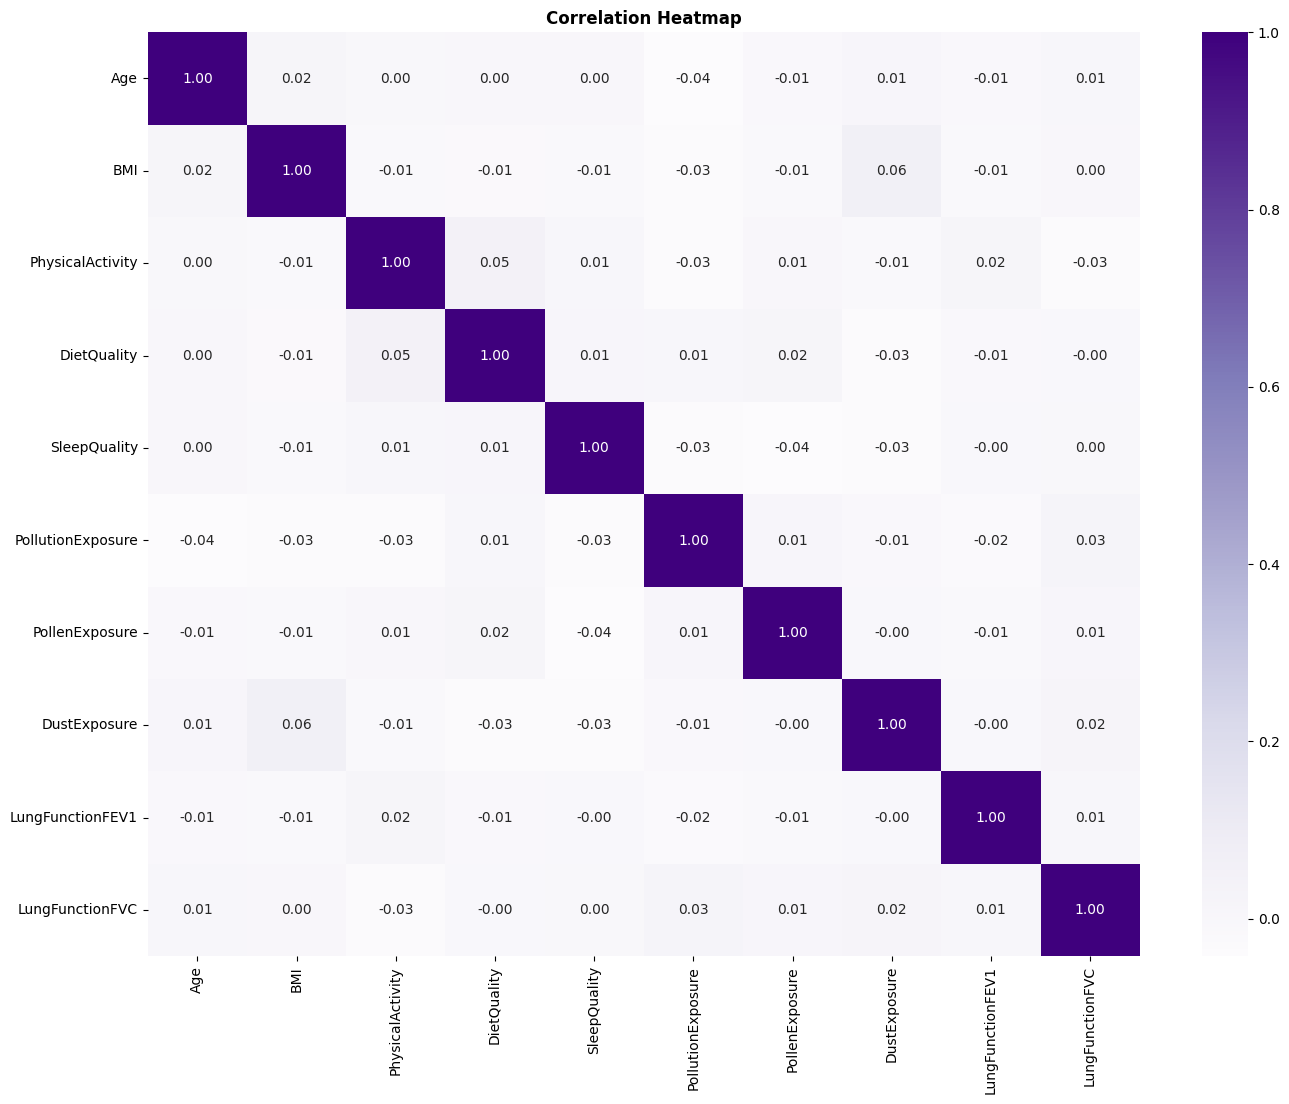

In [ ]:
plt.figure(figsize = (16,12))

sns.heatmap(data = data_numeric.corr(), annot = True, fmt = '.2f',  cmap = "Purples")

plt.title('Correlation Heatmap', weight = 'bold')

plt.show()

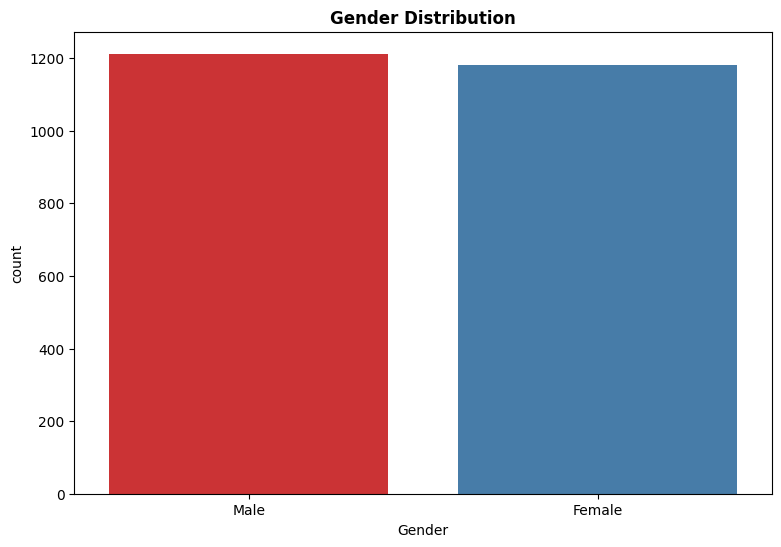

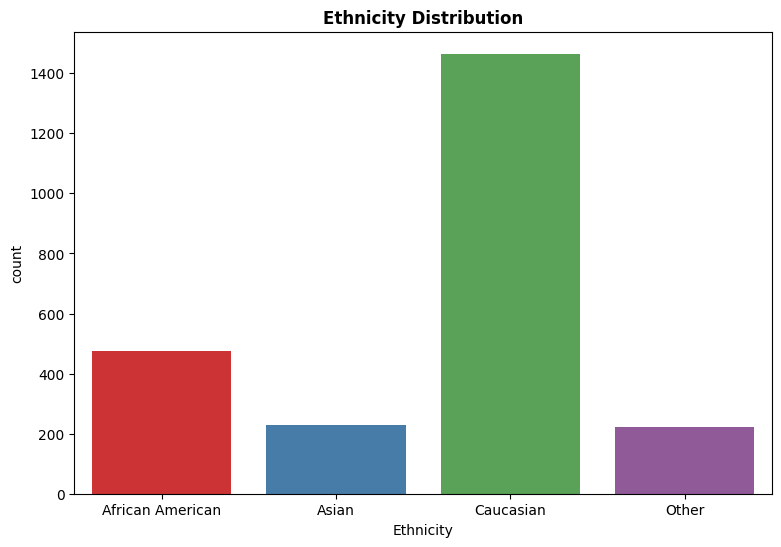

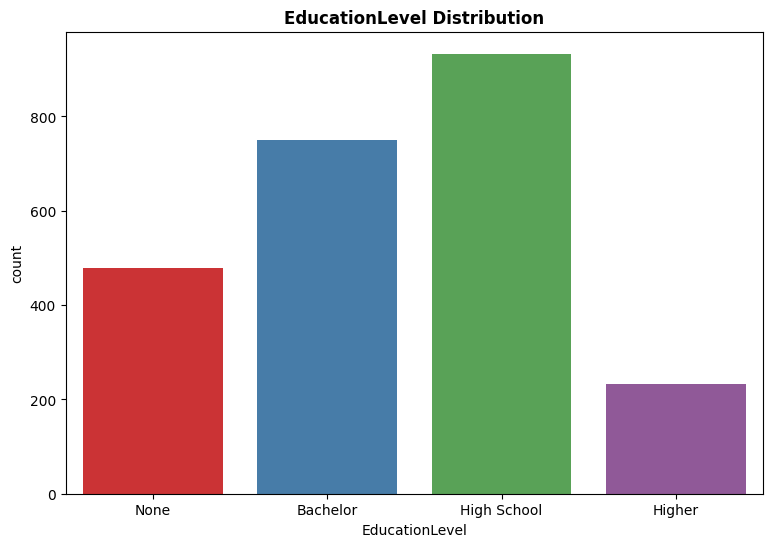

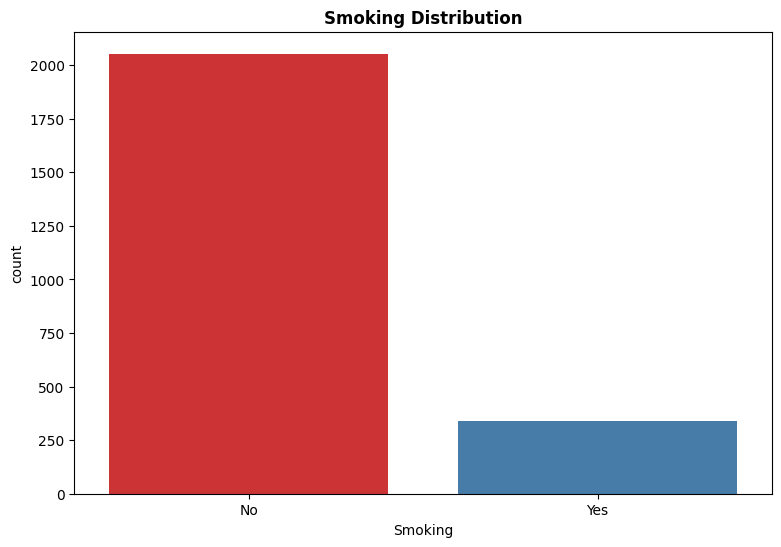

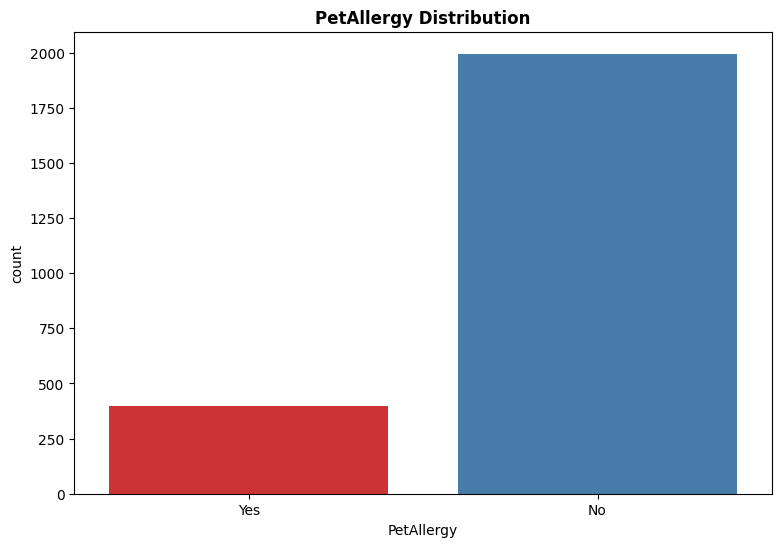

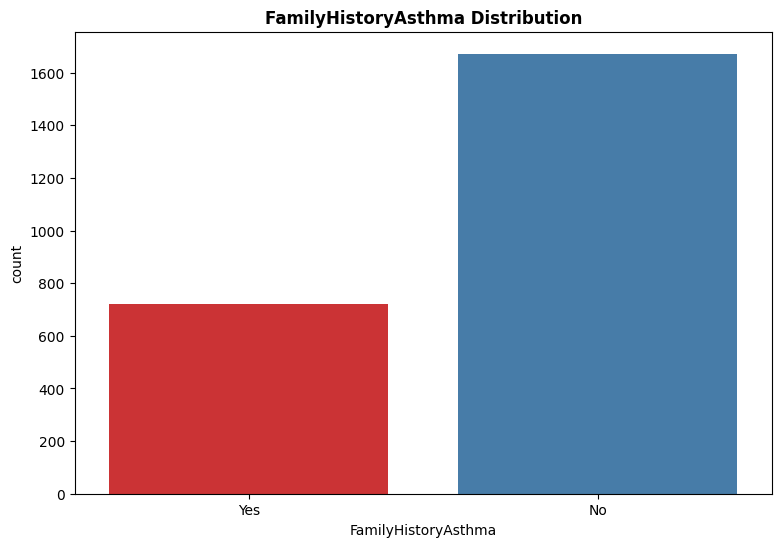

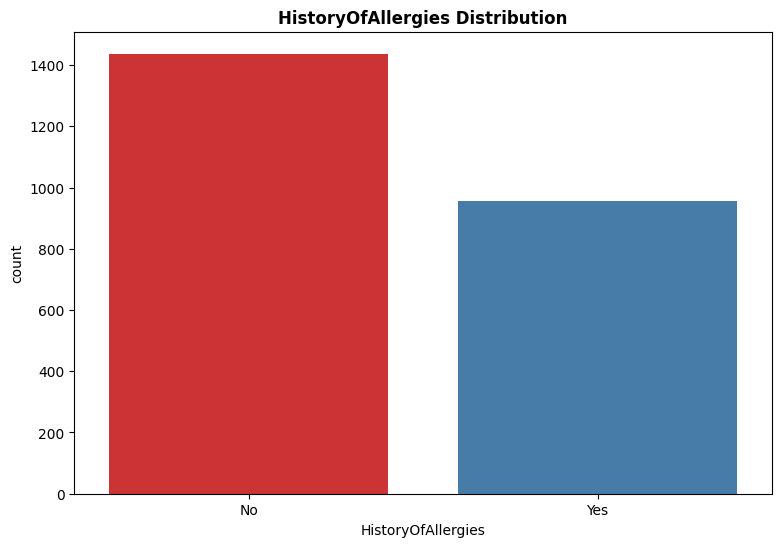

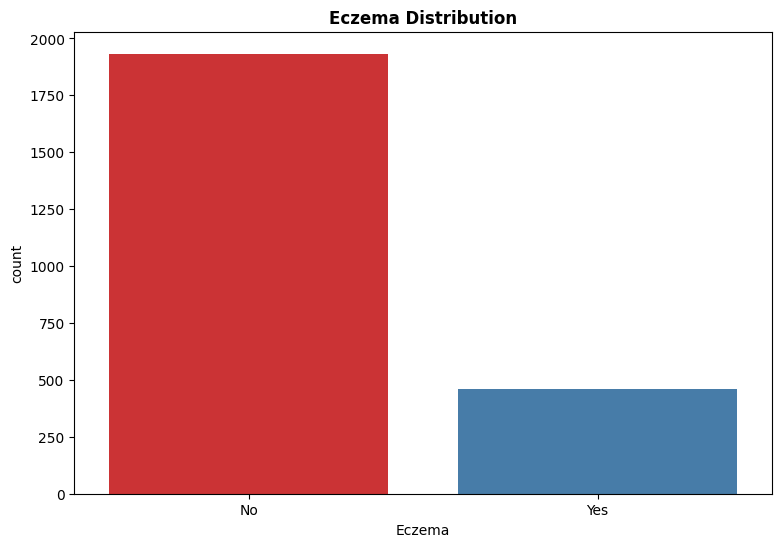

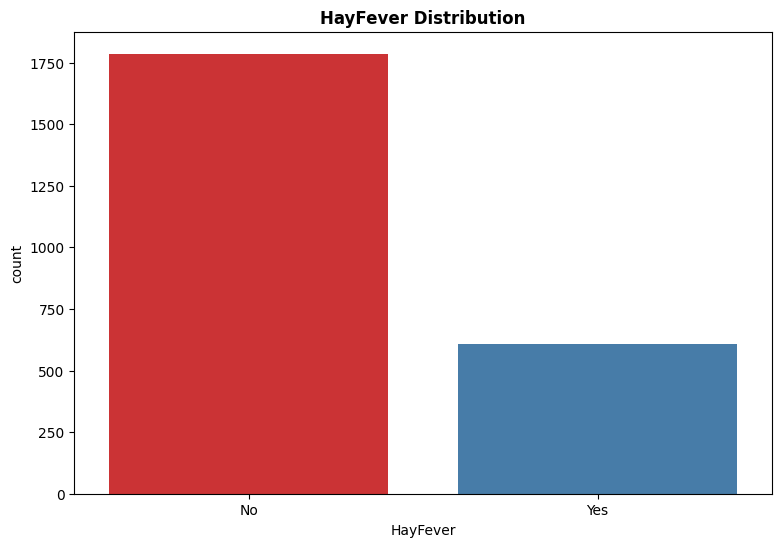

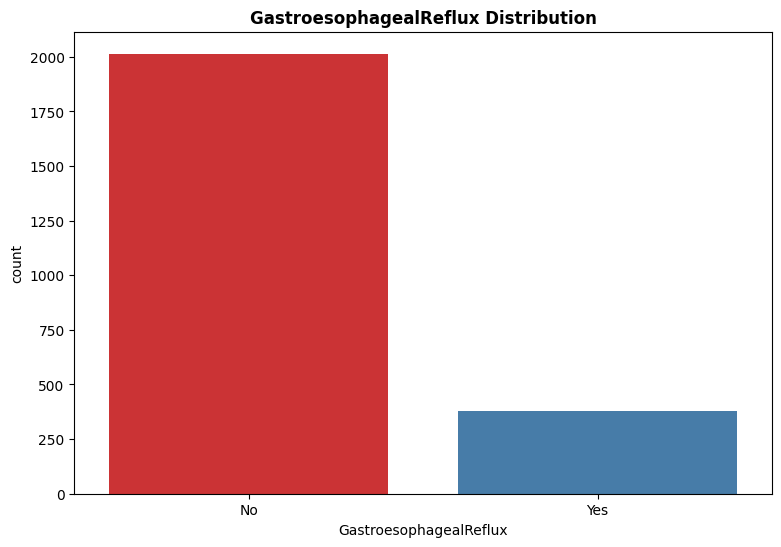

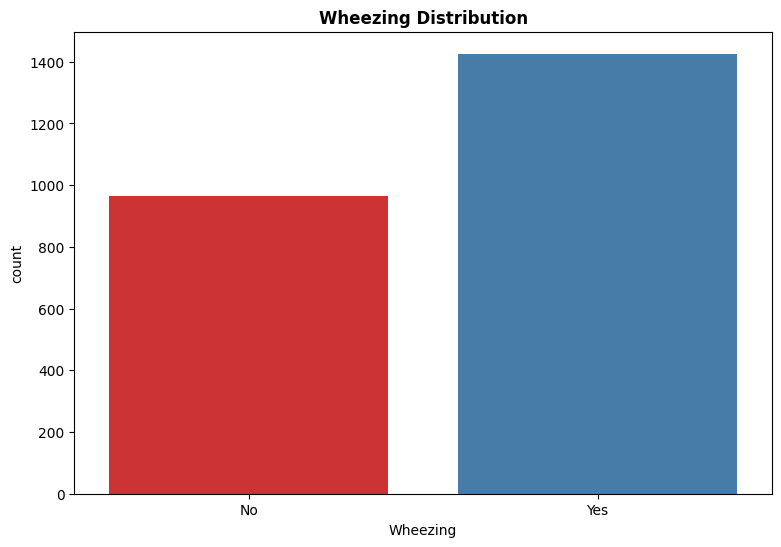

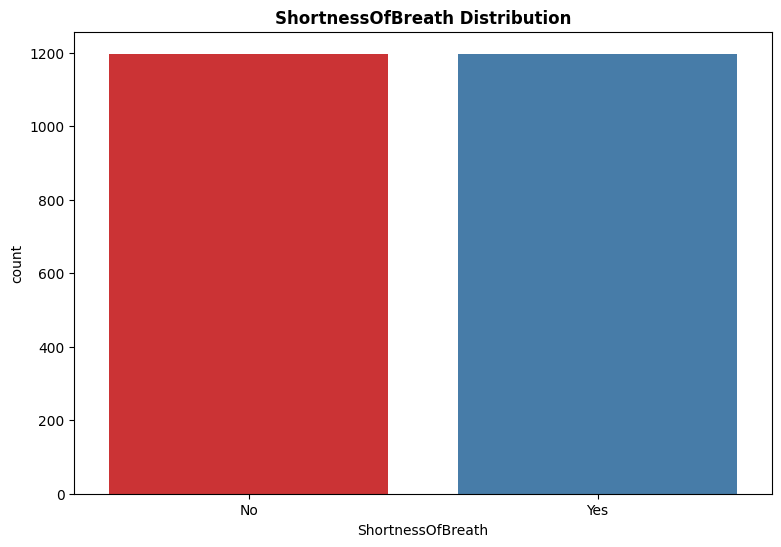

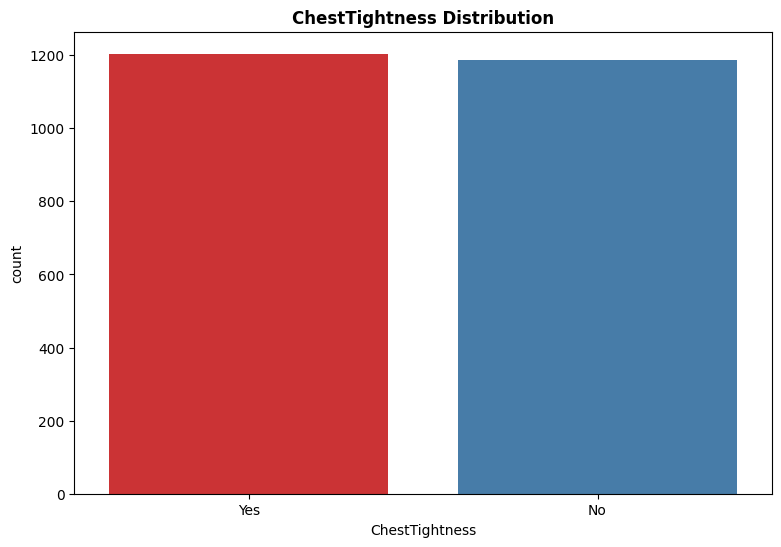

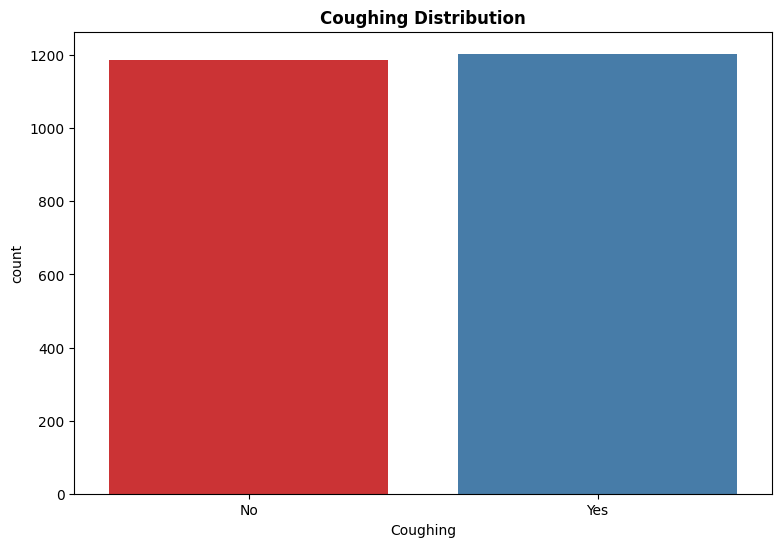

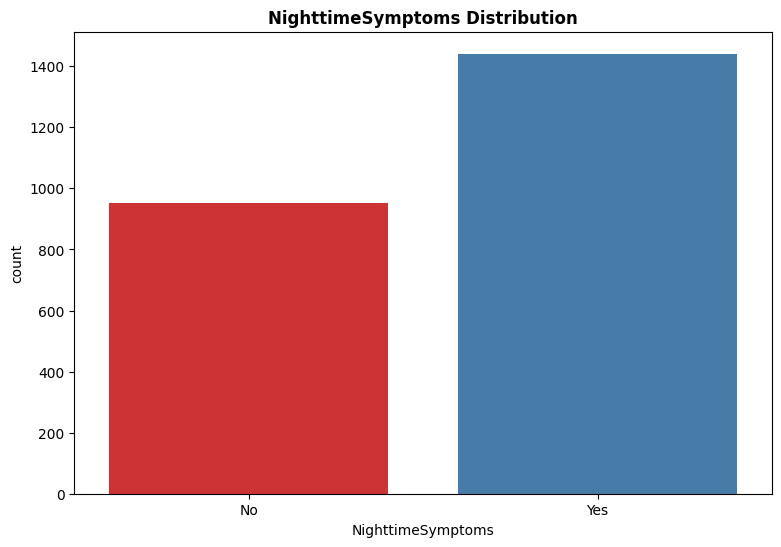

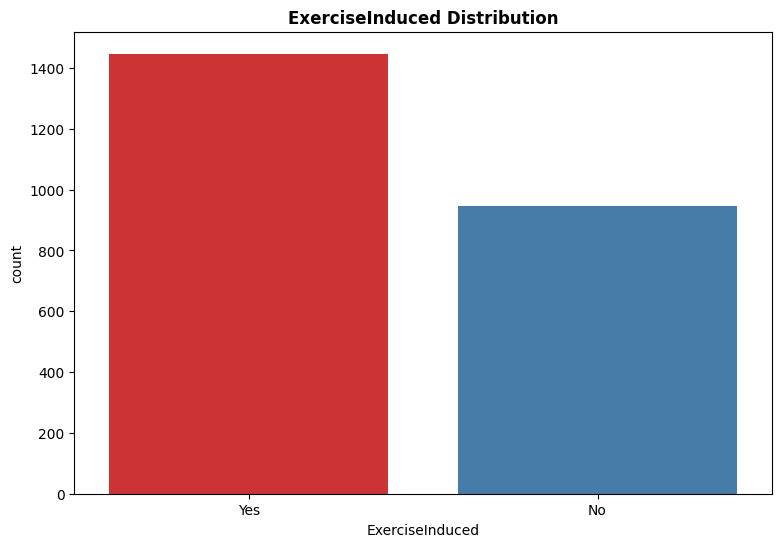

In [ ]:
for i in data_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + ' Distribution', weight = 'bold')
    sns.countplot(x = data_categorical[i], palette = 'Set1')
    plt.show()
    print()

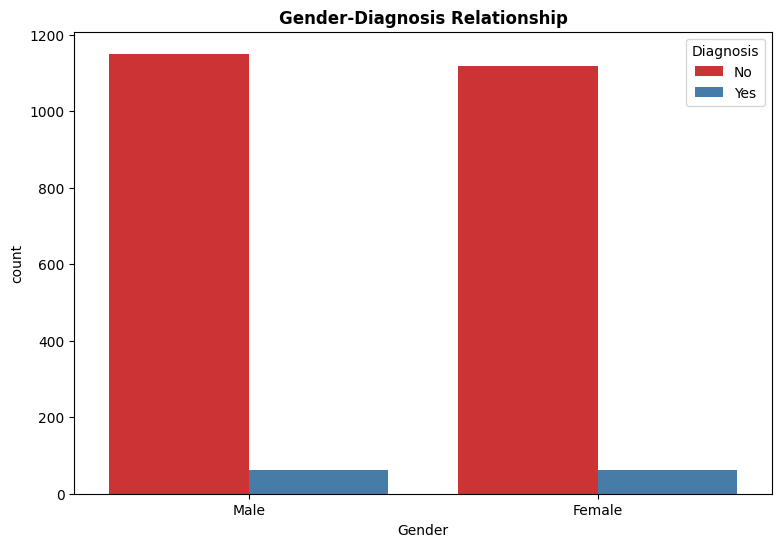

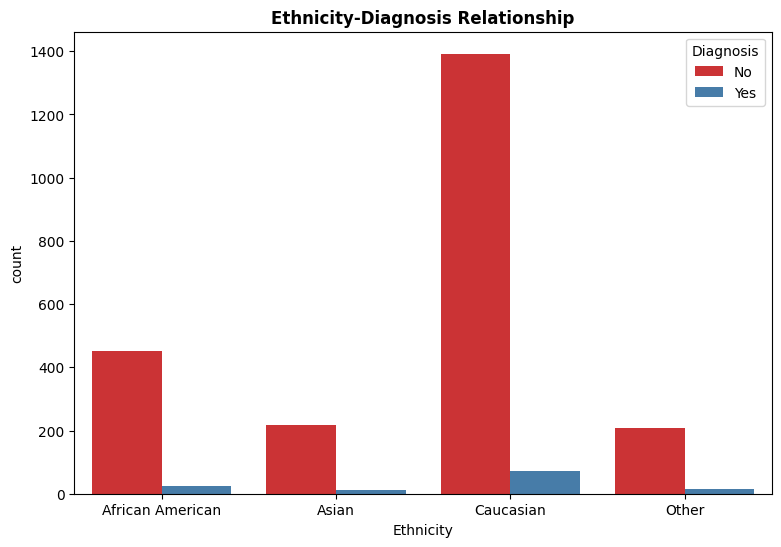

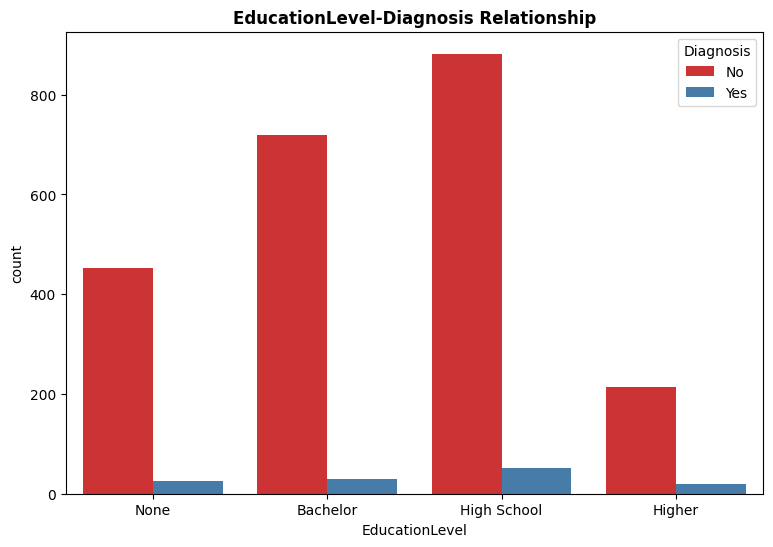

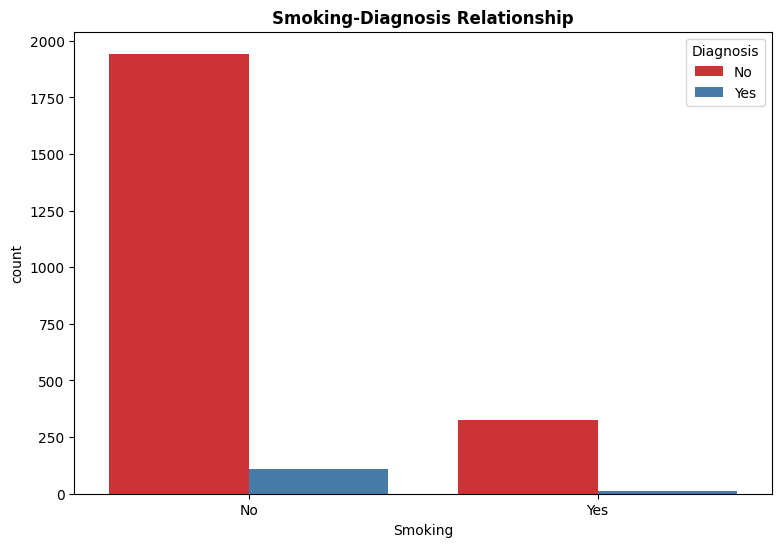

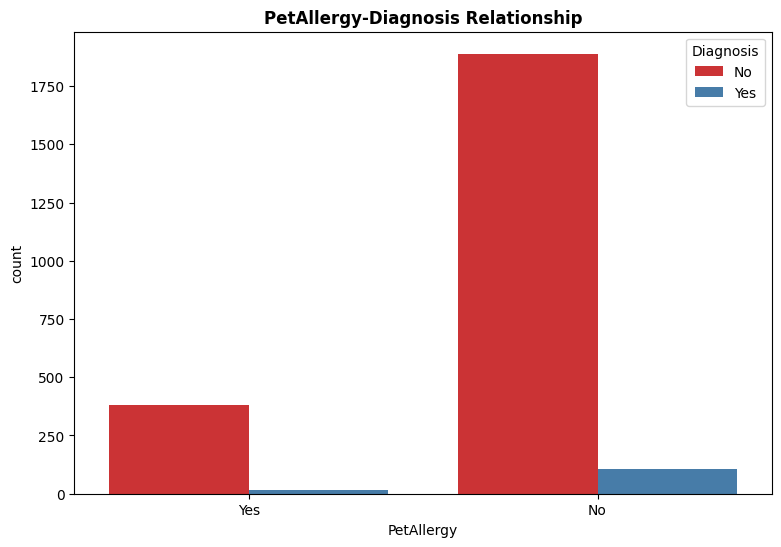

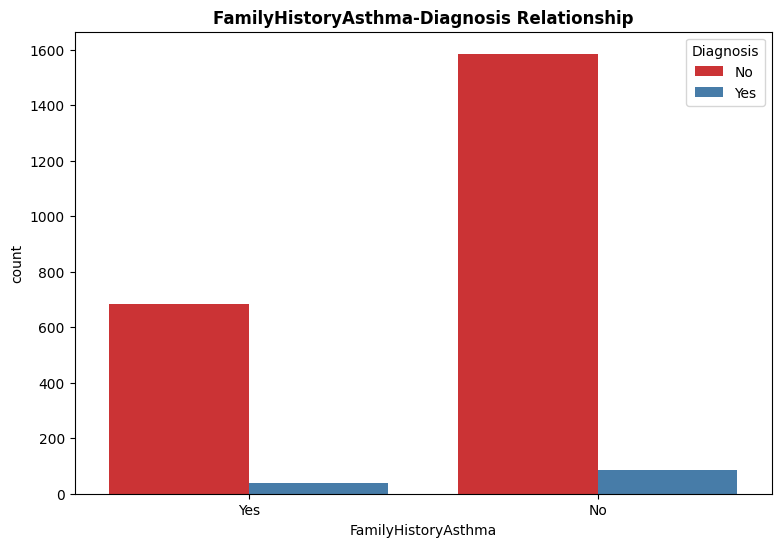

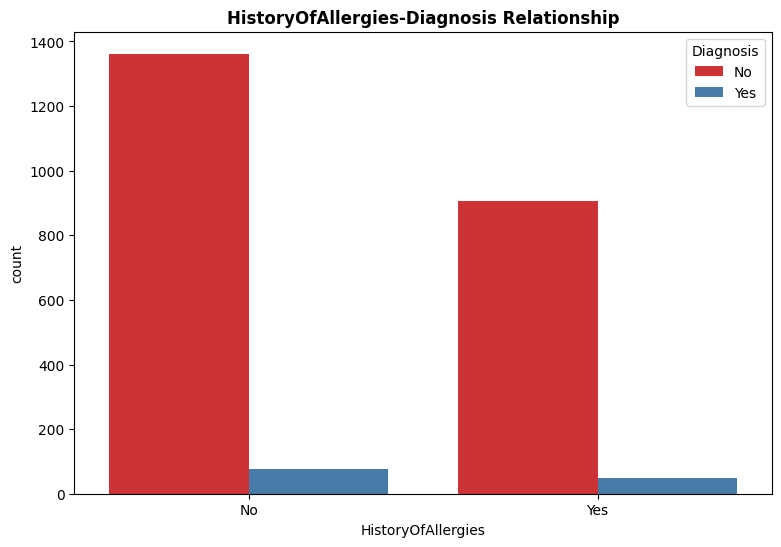

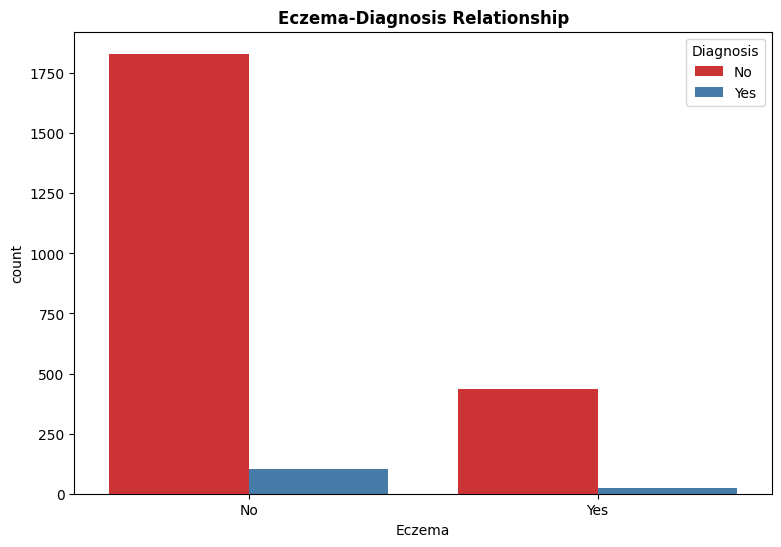

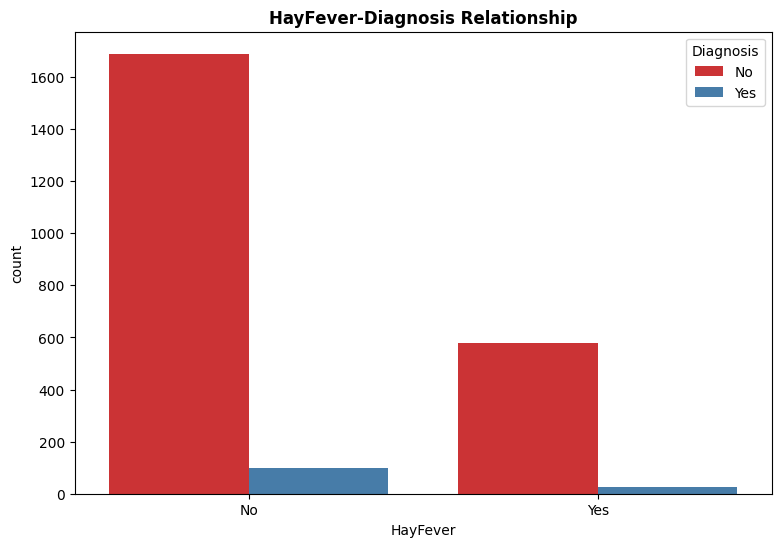

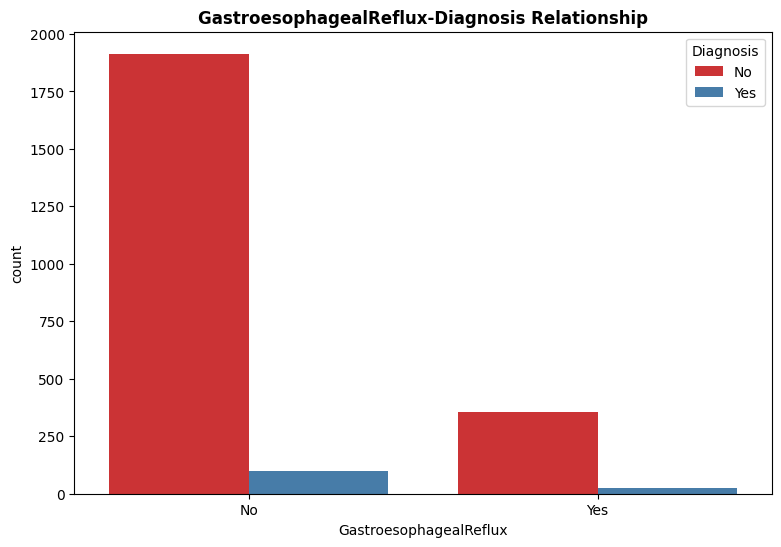

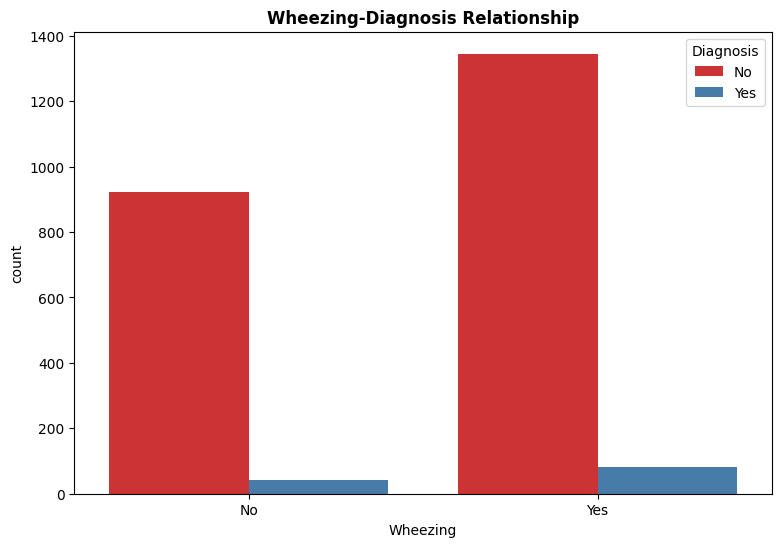

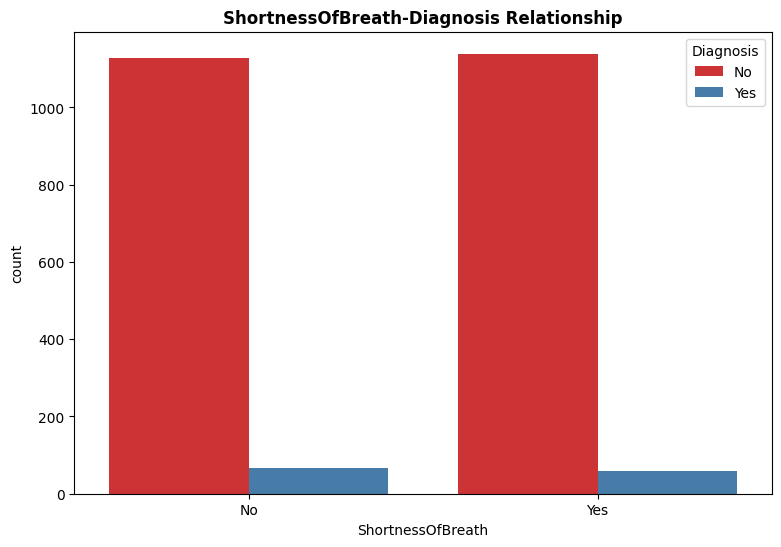

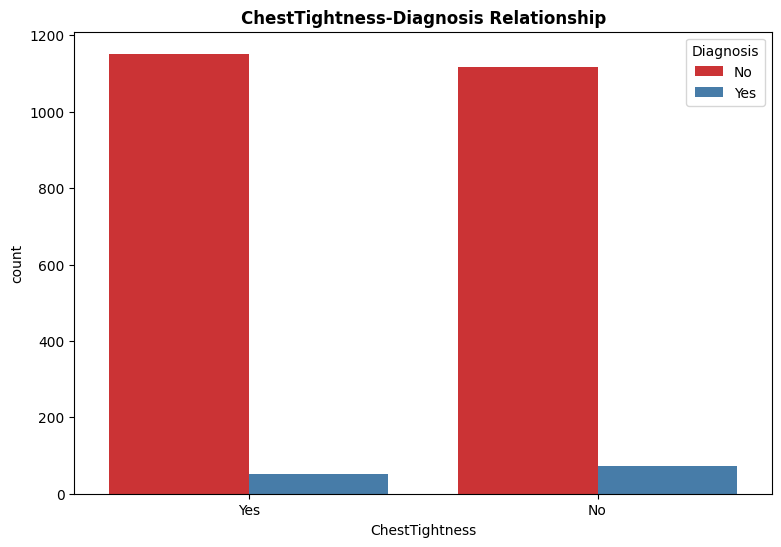

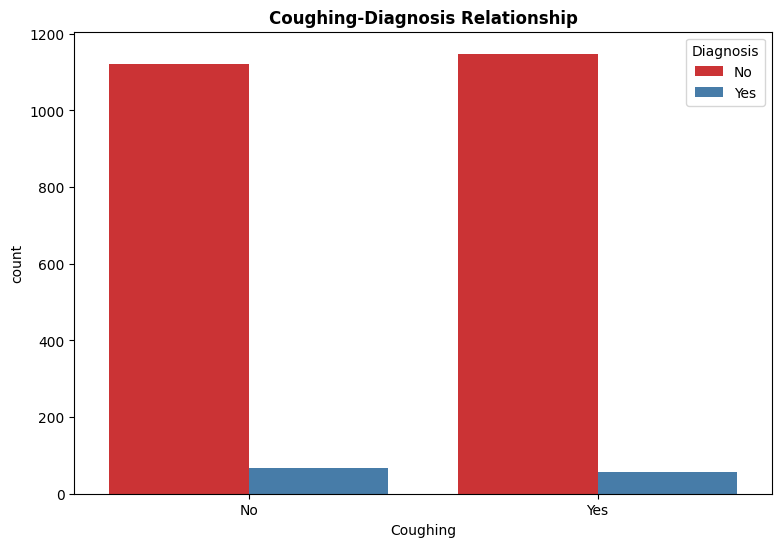

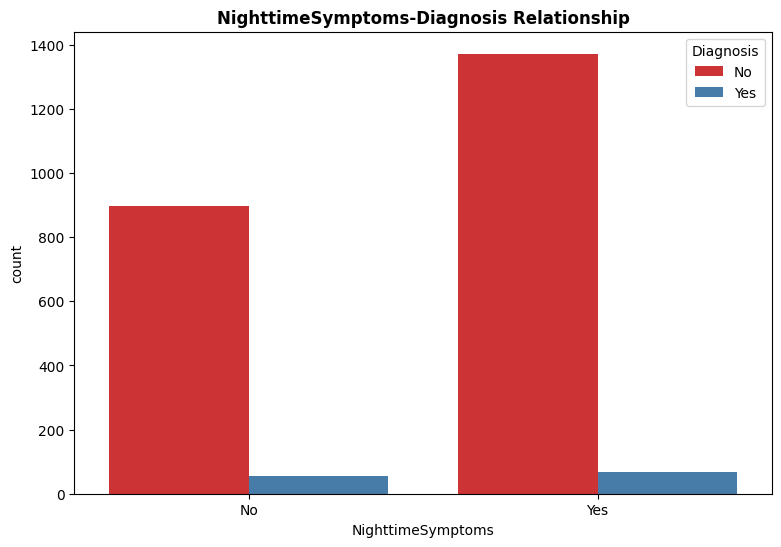

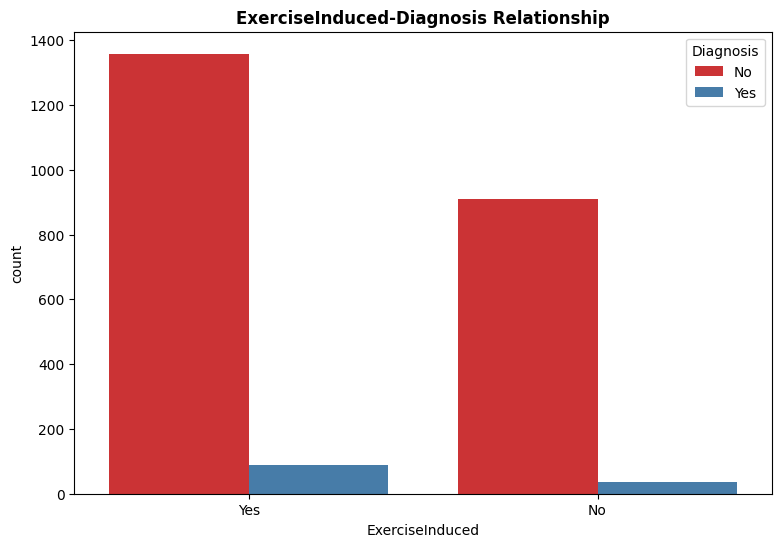

In [ ]:
for i in data_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + '-Diagnosis Relationship', weight = 'bold')
    sns.countplot(x = data_categorical[i], hue = data['Diagnosis'], palette = 'Set1')
    plt.show()
    print()

Diagnosis

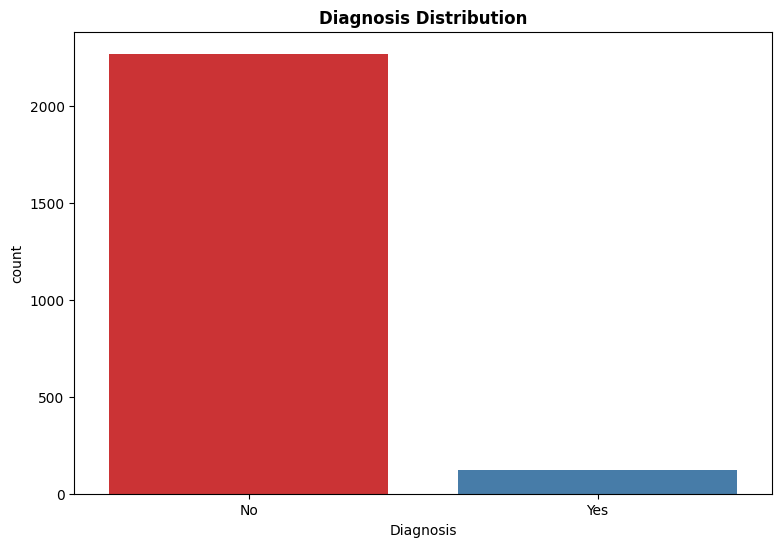

In [ ]:
plt.figure(figsize = (9,6))
plt.title('Diagnosis Distribution', weight = 'bold')
sns.countplot(x = data['Diagnosis'], palette = 'Set1')
plt.show()

In [ ]:
data['Diagnosis'].value_counts(normalize = True).round(2)

,proportion
Diagnosis,
No,0.95
Yes,0.05


95% : No (Not Asthma)

5% : Yes (Asthma)

In [ ]:
Asthma_data = data.loc[data['Diagnosis'] == 'Yes']


In [ ]:
Asthma_data = Asthma_data.reset_index(drop = True)

In [ ]:
Asthma_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,124.0,40.741935,22.747776,5.00,20.7500,39.500,61.0000,79.00
BMI,124.0,26.859032,6.932932,15.18,20.8900,27.125,32.4400,39.54
PhysicalActivity,124.0,5.114194,2.881904,0.03,3.1575,4.915,7.3475,9.92
DietQuality,124.0,4.983387,2.915746,0.03,2.6575,5.080,7.7725,9.86
SleepQuality,124.0,7.152581,1.700440,4.10,5.7225,7.400,8.4675,9.96
PollutionExposure,124.0,4.956048,3.041301,0.04,2.2600,5.115,7.5150,9.93
PollenExposure,124.0,5.301371,2.848723,0.17,2.7075,5.500,7.9750,9.93
DustExposure,124.0,4.664435,2.817269,0.17,2.2800,4.620,6.8450,9.95
LungFunctionFEV1,124.0,2.634677,0.812375,1.05,2.0025,2.710,3.3000,3.99
LungFunctionFVC,124.0,3.906129,1.309086,1.51,2.9575,3.870,4.9375,5.94


In [ ]:
le = LabelEncoder()

columns_to_encode = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy',
    'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
    'GastroesophagealReflux', 'Wheezing', 'ShortnessOfBreath',
    'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
    'Diagnosis'
]


for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])
    print(f"{column} inverse transformed: {le.inverse_transform(list(range(len(data[column].unique()))))}")

Gender inverse transformed: ['Female' 'Male']
Ethnicity inverse transformed: ['African American' 'Asian' 'Caucasian' 'Other']
EducationLevel inverse transformed: ['Bachelor' 'High School' 'Higher' 'None']
Smoking inverse transformed: ['No' 'Yes']
PetAllergy inverse transformed: ['No' 'Yes']
FamilyHistoryAsthma inverse transformed: ['No' 'Yes']
HistoryOfAllergies inverse transformed: ['No' 'Yes']
Eczema inverse transformed: ['No' 'Yes']
HayFever inverse transformed: ['No' 'Yes']
GastroesophagealReflux inverse transformed: ['No' 'Yes']
Wheezing inverse transformed: ['No' 'Yes']
ShortnessOfBreath inverse transformed: ['No' 'Yes']
ChestTightness inverse transformed: ['No' 'Yes']
Coughing inverse transformed: ['No' 'Yes']
NighttimeSymptoms inverse transformed: ['No' 'Yes']
ExerciseInduced inverse transformed: ['No' 'Yes']
Diagnosis inverse transformed: ['No' 'Yes']


In [ ]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,1,0,3,15.85,0,0.89,5.49,8.70,7.39,...,0,1.37,4.94,0,0,1,0,0,1,0
1,26,0,1,0,22.76,0,5.90,6.34,5.15,1.97,...,0,2.20,1.70,1,0,0,1,1,1,0
2,57,1,1,1,18.40,0,6.74,9.20,6.84,1.46,...,0,1.70,5.02,1,1,1,0,1,1,0
3,40,0,1,1,38.52,0,1.40,5.83,4.25,0.58,...,0,3.03,2.30,1,0,1,1,1,0,0
4,61,1,2,2,19.28,0,4.60,3.13,9.63,0.98,...,0,3.47,3.07,1,1,1,0,0,1,0


In [ ]:
x = data.drop(columns = ['Diagnosis'])

y = data['Diagnosis']

In [ ]:
x.shape, y.shape

((2392, 26), (2392,))

In [ ]:
y.value_counts()

,count
Diagnosis,
0,2268
1,124


In [ ]:
smote = SMOTE(random_state = 42)

x, y = smote.fit_resample(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)
x_train.shape, y_train.shape

((3628, 26), (3628,))

In [ ]:
x_test.shape, y_test.shape

((908, 26), (908,))

In [ ]:
def ROC_Curve(model, x_test):
    y_pred_proba = model.predict_proba(x_test)[:,1]
    FPR, TPR, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.title('ROC Curve', fontsize = 16, weight = 'bold')
    plt.xlabel('False Positive Rate(FPR)', fontsize = 14)
    plt.ylabel('True Positive Rate(TPR)', fontsize = 14)
    plt.plot(FPR, TPR, label = 'Area Under ROC Curve: %0.2f' %(auc))
    plt.legend()
    plt.show()

# Logistic Regression

In [ ]:
logistic_reg = LogisticRegression(solver = 'liblinear')

logistic_reg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
logistic_reg_predictions = logistic_reg.predict(x_test)

print('Asthma', sum(logistic_reg_predictions == 1))
print('Not Asthma', sum(logistic_reg_predictions == 0))

Asthma 467
Not Asthma 441


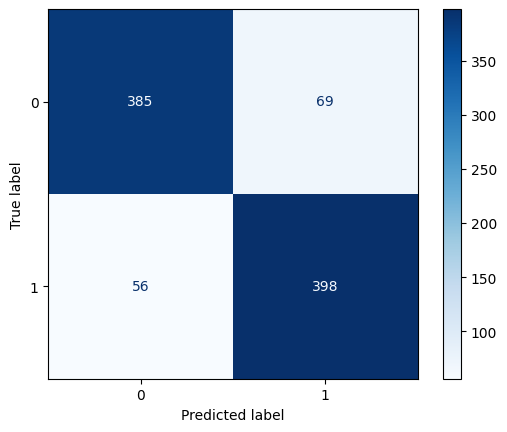

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, logistic_reg_predictions,
                                        labels = logistic_reg.classes_, cmap = 'Blues')

plt.show()

In [ ]:
print(classification_report(y_test, logistic_reg_predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       454
           1       0.85      0.88      0.86       454

    accuracy                           0.86       908
   macro avg       0.86      0.86      0.86       908
weighted avg       0.86      0.86      0.86       908



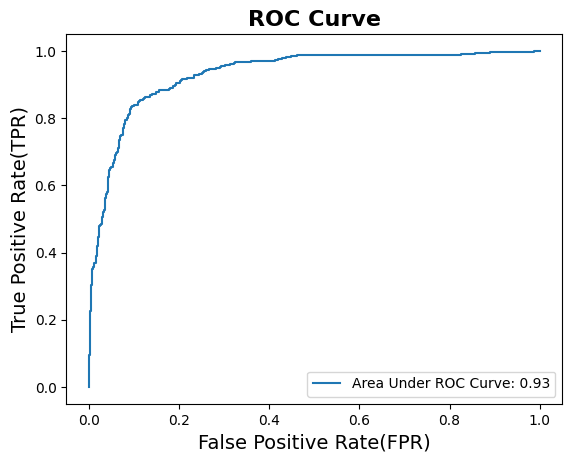

In [ ]:
ROC_Curve(logistic_reg, x_test)
